In [1]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('creditcard.csv')

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.shape

(284807, 31)

In [17]:
#all the data is already scaled, we only need to scale the Time and Amount columns

from sklearn.preprocessing import RobustScaler

#we are using RobustScaler because it is less prone to Outliers

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [18]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [24]:
#splitting the data before random under-sampling, because later on, we want to test our models on the original dataset

from sklearn.model_selection import StratifiedKFold

print("No frauds:", round(df['Class'].value_counts()[0]/len(df) * 100, 2))
print("Frauds:", round(df['Class'].value_counts()[1]/len(df) * 100, 2))

X = df.drop(['Class'], axis = 1)
y = df['Class']
      
sss = StratifiedKFold()
      
for train_index, test_index in sss.split(X, y):
     print("TRAIN:", train_index, "TEST:", test_index)
     OG_X_train, OG_X_test = X.iloc[train_index], X.iloc[test_index]
     OG_y_train, OG_y_test = y.iloc[train_index], y.iloc[test_index]
      
# since we will be having X_train, X_test, y_train and y_test while splitting the undersampled data, hence we are using OG
# as a suffix here to indicate the split of Original data

No frauds: 99.83
Frauds: 0.17
TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


In [27]:
#checking if both the train and test sets are similarly distributed or not
train_unique_label, train_counts_label = np.unique(OG_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(OG_y_test, return_counts=True)

print(train_counts_label/ len(OG_y_train))
print(test_counts_label/ len(OG_y_test))

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [28]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# from the above, we can observe that the data is imbalanced
# to counter this, we have to perform random undersampling to balance the data

In [29]:
#shuffling the data before random sampling

df = df.sample(frac=1)

In [30]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
199978,1.537917,-1.118107,-1.621756,0.394019,1.596456,4.205980,-0.999091,1.081079,0.898796,0.074676,...,-0.158783,0.175708,0.657188,-0.387432,-0.824595,0.052777,0.006628,0,2.558513,0.570190
110761,-2.676908,-0.254473,0.530839,1.589977,0.746987,-1.100256,-0.976151,0.733196,-0.789089,-0.317745,...,0.191596,-0.818140,0.191155,-0.483817,-0.368856,0.049521,-0.429318,0,-0.272619,-0.149520
119005,1.065764,-0.670705,1.161876,0.329204,-1.391943,-0.136147,-0.807727,0.277254,1.483166,-0.455614,...,-0.426470,0.139115,0.433351,-0.063696,0.954162,-0.037774,0.016976,0,0.376581,-0.110445
3938,0.900987,-1.198726,0.391595,-2.028156,-1.079939,-0.037108,-0.545993,0.121461,2.091281,-1.600683,...,0.895777,-0.339127,-0.215737,0.588879,-0.627919,0.091731,0.045328,0,2.070565,-0.953359
179816,-1.269472,1.664456,-0.726899,-0.875793,-0.047050,-0.755419,0.339618,0.647620,0.167416,0.458333,...,-0.619802,0.111026,-0.366117,-0.317659,0.131431,0.143599,-0.080555,0,-0.169496,0.464738


In [31]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

In [33]:
normally_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normally_distributed_df.sample(frac = 1, random_state = 42)

In [34]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
69385,-1.126996,1.153055,1.397923,3.060821,1.015221,2.144787,-0.189868,-1.522753,-0.337669,0.895850,...,-0.453575,0.792152,-0.772962,-1.240642,-0.112508,-0.253824,-0.367672,0,-0.201495,-0.367638
177195,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,0.004847,-2.776747,...,0.863592,0.450743,-0.144228,-0.205609,-0.539073,0.503418,-0.237807,1,-0.153706,0.450969
256651,-1.095244,-2.084863,-1.612821,-1.650286,-0.699437,0.513547,2.733292,-0.284772,-1.575088,-0.246401,...,0.839513,1.446256,0.032023,-0.263077,-0.259623,-0.065248,0.265177,0,9.124572,0.858833
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,...,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,1,9.863900,0.637343
9179,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1,-0.293440,-0.840776


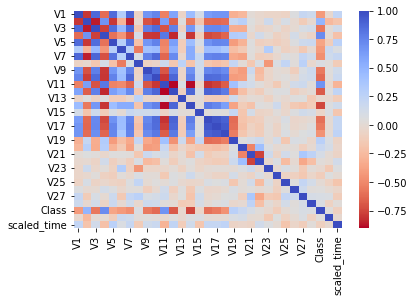

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

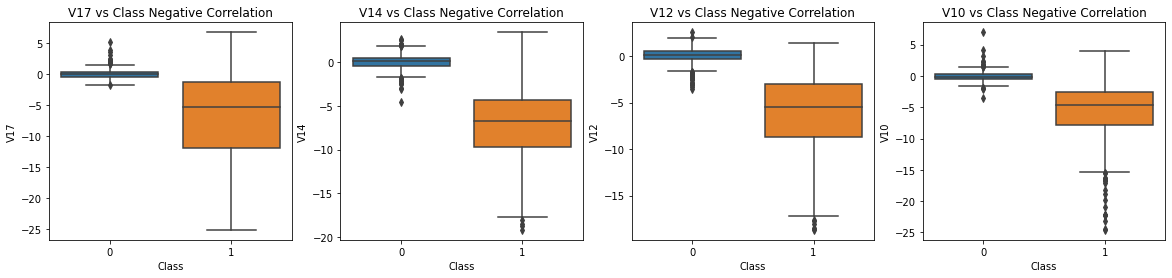

In [45]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

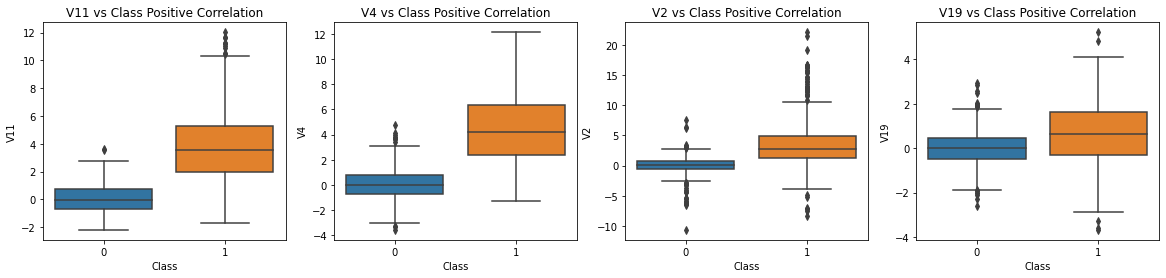

In [47]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [48]:
# removing outliers from highly negatively correlated columns

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.6837146333443, -18.5536970096458, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-22.1870885620007, -24.588262

In [49]:
# splitting the undersampled dataset

X = new_df.drop(['Class'], axis = 1)
y = new_df['Class']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from flaml import AutoML

automl_settings = {
    "time_budget": 60,
    "metric": 'accuracy',
    "task": 'classification'
}

automl = AutoML()
automl.fit(X_train = X_train, y_train = y_train, **automl_settings)

[flaml.automl: 08-30 11:54:13] {2565} INFO - task = classification
[flaml.automl: 08-30 11:54:13] {2567} INFO - Data split method: stratified
[flaml.automl: 08-30 11:54:13] {2570} INFO - Evaluation method: cv
[flaml.automl: 08-30 11:54:13] {2689} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 08-30 11:54:13] {2831} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 08-30 11:54:13] {3133} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-30 11:54:13] {3266} INFO - Estimated sufficient time budget=420s. Estimated necessary time budget=10s.
[flaml.automl: 08-30 11:54:13] {3313} INFO -  at 0.2s,	estimator lgbm's best error=0.0726,	best estimator lgbm's best error=0.0726
[flaml.automl: 08-30 11:54:13] {3133} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-30 11:54:13] {3313} INFO -  at 0.3s,	estimator lgbm's best error=0.0725,	best estimator lgbm's best error=0.0725
[flaml.automl: 08-30 11

[flaml.automl: 08-30 11:54:17] {3133} INFO - iteration 35, current learner extra_tree
[flaml.automl: 08-30 11:54:17] {3313} INFO -  at 3.6s,	estimator extra_tree's best error=0.0646,	best estimator extra_tree's best error=0.0646
[flaml.automl: 08-30 11:54:17] {3133} INFO - iteration 36, current learner extra_tree
[flaml.automl: 08-30 11:54:17] {3313} INFO -  at 3.7s,	estimator extra_tree's best error=0.0646,	best estimator extra_tree's best error=0.0646
[flaml.automl: 08-30 11:54:17] {3133} INFO - iteration 37, current learner extra_tree
[flaml.automl: 08-30 11:54:17] {3313} INFO -  at 3.8s,	estimator extra_tree's best error=0.0607,	best estimator extra_tree's best error=0.0607
[flaml.automl: 08-30 11:54:17] {3133} INFO - iteration 38, current learner extra_tree
[flaml.automl: 08-30 11:54:17] {3313} INFO -  at 4.0s,	estimator extra_tree's best error=0.0593,	best estimator extra_tree's best error=0.0593
[flaml.automl: 08-30 11:54:17] {3133} INFO - iteration 39, current learner extra_tre

[flaml.automl: 08-30 11:54:22] {3133} INFO - iteration 71, current learner xgb_limitdepth
[flaml.automl: 08-30 11:54:22] {3313} INFO -  at 8.5s,	estimator xgb_limitdepth's best error=0.0646,	best estimator extra_tree's best error=0.0593
[flaml.automl: 08-30 11:54:22] {3133} INFO - iteration 72, current learner extra_tree
[flaml.automl: 08-30 11:54:22] {3313} INFO -  at 8.7s,	estimator extra_tree's best error=0.0593,	best estimator extra_tree's best error=0.0593
[flaml.automl: 08-30 11:54:22] {3133} INFO - iteration 73, current learner xgb_limitdepth
[flaml.automl: 08-30 11:54:22] {3313} INFO -  at 8.8s,	estimator xgb_limitdepth's best error=0.0646,	best estimator extra_tree's best error=0.0593
[flaml.automl: 08-30 11:54:22] {3133} INFO - iteration 74, current learner extra_tree
[flaml.automl: 08-30 11:54:22] {3313} INFO -  at 9.0s,	estimator extra_tree's best error=0.0593,	best estimator extra_tree's best error=0.0593
[flaml.automl: 08-30 11:54:22] {3133} INFO - iteration 75, current l

[flaml.automl: 08-30 11:54:27] {3313} INFO -  at 13.5s,	estimator extra_tree's best error=0.0567,	best estimator extra_tree's best error=0.0567
[flaml.automl: 08-30 11:54:27] {3133} INFO - iteration 108, current learner extra_tree
[flaml.automl: 08-30 11:54:27] {3313} INFO -  at 13.6s,	estimator extra_tree's best error=0.0567,	best estimator extra_tree's best error=0.0567
[flaml.automl: 08-30 11:54:27] {3133} INFO - iteration 109, current learner extra_tree
[flaml.automl: 08-30 11:54:27] {3313} INFO -  at 13.8s,	estimator extra_tree's best error=0.0567,	best estimator extra_tree's best error=0.0567
[flaml.automl: 08-30 11:54:27] {3133} INFO - iteration 110, current learner extra_tree
[flaml.automl: 08-30 11:54:27] {3313} INFO -  at 13.9s,	estimator extra_tree's best error=0.0567,	best estimator extra_tree's best error=0.0567
[flaml.automl: 08-30 11:54:27] {3133} INFO - iteration 111, current learner lgbm
[flaml.automl: 08-30 11:54:27] {3313} INFO -  at 13.9s,	estimator lgbm's best erro

[flaml.automl: 08-30 11:54:31] {3133} INFO - iteration 143, current learner extra_tree
[flaml.automl: 08-30 11:54:31] {3313} INFO -  at 17.8s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:31] {3133} INFO - iteration 144, current learner extra_tree
[flaml.automl: 08-30 11:54:31] {3313} INFO -  at 18.0s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:31] {3133} INFO - iteration 145, current learner extra_tree
[flaml.automl: 08-30 11:54:31] {3313} INFO -  at 18.1s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:31] {3133} INFO - iteration 146, current learner extra_tree
[flaml.automl: 08-30 11:54:31] {3313} INFO -  at 18.2s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:31] {3133} INFO - iteration 147, current learner 

C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 08-30 11:54:35] {3313} INFO -  at 21.9s,	estimator lrl1's best error=0.0606,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:35] {3133} INFO - iteration 179, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ 

[flaml.automl: 08-30 11:54:36] {3133} INFO - iteration 187, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 08-30 11:54:36] {3313} INFO -  at 23.3s,	estimator lrl1's best error=0.0606,	best estimat

C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 08-30 11:54:38] {3313} INFO -  at 24.9s,	estimator lrl1's best error=0.0593,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:38] {3133} INFO - it

[flaml.automl: 08-30 11:54:40] {3133} INFO - iteration 210, current learner extra_tree
[flaml.automl: 08-30 11:54:40] {3313} INFO -  at 26.5s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:40] {3133} INFO - iteration 211, current learner extra_tree
[flaml.automl: 08-30 11:54:40] {3313} INFO -  at 26.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:40] {3133} INFO - iteration 212, current learner extra_tree
[flaml.automl: 08-30 11:54:40] {3313} INFO -  at 26.8s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:40] {3133} INFO - iteration 213, current learner extra_tree
[flaml.automl: 08-30 11:54:40] {3313} INFO -  at 26.9s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:40] {3133} INFO - iteration 214, current learner 

[flaml.automl: 08-30 11:54:42] {3313} INFO -  at 28.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:42] {3133} INFO - iteration 229, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[flaml.automl: 08-30 11:54:44] {3313} INFO -  at 30.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:44] {3133} INFO - iteration 244, current learner extra_tree
[flaml.automl: 08-30 11:54:44] {3313} INFO -  at 30.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:44] {3133} INFO - iteration 245, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.p

[flaml.automl: 08-30 11:54:46] {3133} INFO - iteration 260, current learner extra_tree
[flaml.automl: 08-30 11:54:46] {3313} INFO -  at 32.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:46] {3133} INFO - iteration 261, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\

[flaml.automl: 08-30 11:54:48] {3133} INFO - iteration 282, current learner extra_tree
[flaml.automl: 08-30 11:54:49] {3313} INFO -  at 35.5s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:49] {3133} INFO - iteration 283, current learner extra_tree
[flaml.automl: 08-30 11:54:49] {3313} INFO -  at 35.6s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:49] {3133} INFO - iteration 284, current learner extra_tree
[flaml.automl: 08-30 11:54:49] {3313} INFO -  at 35.8s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:49] {3133} INFO - iteration 285, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: C

C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 08-30 11:54:51] {3313} INFO -  at 37.5s,	estimator lrl1's best error=0.0593,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:51] {3133} INFO - iteration 298, current learner extra_tree
[flaml.automl: 08-30 11:54:51] {3313} INFO -  at 37.6s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:51] {3133} INFO - iteration 299, current learner extra_tree
[flaml.automl: 08-30 11:54:51] {3313} INFO -  at 37.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:51] {3133} INFO - iteration 300, current learner extra_tree
[flaml.automl: 08-30 11:54:51] {3313} INFO -  at 37.8s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml

C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[flaml.automl: 08-30 11:54:53] {3313} INFO -  at 39.9s,	estimator lrl1's best error=0.0593,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:53] {3133} INFO - iteration 318, current learner extra_tree
[flaml.automl: 08-30 11:54:53] {3313} INFO -  at 40.0s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:53] {3133} INFO - iteration 319, current learner extra_tree
[flaml.automl: 08-30 11:54:53] {3313} INFO -  at 40.1s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:53] {3133} INFO - iteration 320, current learne

[flaml.automl: 08-30 11:54:56] {3313} INFO -  at 42.7s,	estimator lgbm's best error=0.0725,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:56] {3133} INFO - iteration 342, current learner extra_tree
[flaml.automl: 08-30 11:54:56] {3313} INFO -  at 42.9s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:56] {3133} INFO - iteration 343, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350:

[flaml.automl: 08-30 11:54:58] {3133} INFO - iteration 355, current learner extra_tree
[flaml.automl: 08-30 11:54:58] {3313} INFO -  at 44.6s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:54:58] {3133} INFO - iteration 356, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\

[flaml.automl: 08-30 11:55:00] {3133} INFO - iteration 371, current learner extra_tree
[flaml.automl: 08-30 11:55:00] {3313} INFO -  at 46.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:00] {3133} INFO - iteration 372, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\

[flaml.automl: 08-30 11:55:03] {3313} INFO -  at 49.7s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:03] {3133} INFO - iteration 397, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[flaml.automl: 08-30 11:55:05] {3133} INFO - iteration 415, current learner extra_tree
[flaml.automl: 08-30 11:55:05] {3313} INFO -  at 52.0s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:05] {3133} INFO - iteration 416, current learner extra_tree
[flaml.automl: 08-30 11:55:05] {3313} INFO -  at 52.1s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:05] {3133} INFO - iteration 417, current learner extra_tree
[flaml.automl: 08-30 11:55:05] {3313} INFO -  at 52.3s,	estimator extra_tree's best error=0.0554,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:05] {3133} INFO - iteration 418, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: C

[flaml.automl: 08-30 11:55:07] {3313} INFO -  at 54.0s,	estimator lgbm's best error=0.0673,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:07] {3133} INFO - iteration 438, current learner lgbm
[flaml.automl: 08-30 11:55:07] {3313} INFO -  at 54.0s,	estimator lgbm's best error=0.0620,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:07] {3133} INFO - iteration 439, current learner lgbm
[flaml.automl: 08-30 11:55:07] {3313} INFO -  at 54.1s,	estimator lgbm's best error=0.0620,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:07] {3133} INFO - iteration 440, current learner lgbm
[flaml.automl: 08-30 11:55:07] {3313} INFO -  at 54.1s,	estimator lgbm's best error=0.0620,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:07] {3133} INFO - iteration 441, current learner lgbm
[flaml.automl: 08-30 11:55:07] {3313} INFO -  at 54.2s,	estimator lgbm's best error=0.0620,	best estimator extra_tree's best

[flaml.automl: 08-30 11:55:09] {3133} INFO - iteration 471, current learner lgbm
[flaml.automl: 08-30 11:55:09] {3313} INFO -  at 56.2s,	estimator lgbm's best error=0.0606,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:09] {3133} INFO - iteration 472, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model

[flaml.automl: 08-30 11:55:11] {3133} INFO - iteration 498, current learner lgbm
[flaml.automl: 08-30 11:55:11] {3313} INFO -  at 58.4s,	estimator lgbm's best error=0.0606,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:12] {3133} INFO - iteration 499, current learner lgbm
[flaml.automl: 08-30 11:55:12] {3313} INFO -  at 58.4s,	estimator lgbm's best error=0.0606,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:12] {3133} INFO - iteration 500, current learner lgbm
[flaml.automl: 08-30 11:55:12] {3313} INFO -  at 58.5s,	estimator lgbm's best error=0.0606,	best estimator extra_tree's best error=0.0554
[flaml.automl: 08-30 11:55:12] {3133} INFO - iteration 501, current learner lrl1
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was 

In [56]:
y_pred = automl.predict(OG_X_test)

C:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(OG_y_test, y_pred)

0.9863064201822299